In [13]:
import os
import warnings

import DataReader

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

import warnings

warnings.filterwarnings(action='ignore')

# 주피터 노트북 환경에서 현재 작업 디렉토리 경로를 얻습니다.
current_dir_path = os.getcwd()

# info.yaml 파일의 경로를 현재 작업 디렉토리를 기반으로 구성합니다.
yaml_file_path = os.path.join(current_dir_path, 'info.yaml')
target_col = 'target'

ROOT_PATH = current_dir_path

train, test, label = DataReader.read_from_db(
    yaml_file_path=yaml_file_path,
    table_name="adult_income",
    label_col_name=target_col)


1. train.csv : 학습 데이터<br>
id : 샘플 아이디<br>
age : 나이<br>
workclass : 일 유형<br>
fnlwgt : CPS(Current Population Survey) 가중치<br>
education : 교육수준<br>
education.num : 교육수준 번호<br>
marital.status : 결혼 상태<br>
occupation : 직업<br>
relationship : 가족관계<br>
race : 인종<br>
sex : 성별<br>
capital.gain : 자본 이익<br>
capital.loss : 자본 손실<br>
hours.per.week : 주당 근무시간<br>
native.country : 본 국적<br>
target : 소득<br>
		0 : <=50K (5만 달러 이하)

		1 : >50K (5만 달러 초과) 



1. test.csv : 테스트 데이터<br>
id : 샘플 아이디<br>
age : 나이<br>
workclass : 일 유형<br>
fnlwgt : CPS(Current Population Survey) 가중치<br>
education : 교육수준<br>
education.num : 교육수준 번호<br>
marital.status : 결혼 상태<br>
occupation : 직업<br>
relationship : 가족관계<br>
race : 인종<br>
sex : 성별<br>
capital.gain : 자본 이익<br>
capital.loss : 자본 손실<br>
hours.per.week : 주당 근무시간<br>
native.country : 본 국적<br><br><br>


3. sample_submission.csv : 제출 양식<br>
id : 샘플 아이디<br>
target : 소득<br>
					   0 = <=50K (5만 달러 이하)

					   1 = >50K (5만 달러 초과)

In [14]:
train['target']=label

In [15]:
train.describe()

,index,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,target
count,17480.000000,17480.000000,17480.000000,1.748000e+04,17480.000000,17480.000000,17480.00000,17480.000000,17480.000000
mean,8739.500000,8739.500000,38.720995,1.897610e+05,10.036556,1076.644508,83.87460,40.002460,0.234897
std,5046.185688,5046.185688,14.079617,1.049929e+05,2.604415,7439.498620,396.03288,12.671265,0.423947
min,0.000000,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.00000,1.000000,0.000000
25%,4369.750000,4369.750000,27.000000,1.181558e+05,9.000000,0.000000,0.00000,38.000000,0.000000
50%,8739.500000,8739.500000,37.000000,1.781340e+05,10.000000,0.000000,0.00000,40.000000,0.000000
75%,13109.250000,13109.250000,48.000000,2.373180e+05,12.000000,0.000000,0.00000,45.000000,0.000000
max,17479.000000,17479.000000,90.000000,1.455435e+06,16.000000,99999.000000,4356.00000,99.000000,1.000000


In [16]:
train.head()

,index,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1,1,1,33,Private,205469,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,2,2,46,Private,149949,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,3,3,23,Private,193090,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0
4,4,4,55,Private,60193,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17480 entries, 0 to 17479
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           17480 non-null  int64 
 1   id              17480 non-null  int64 
 2   age             17480 non-null  int64 
 3   workclass       15644 non-null  object
 4   fnlwgt          17480 non-null  int64 
 5   education       17480 non-null  object
 6   education.num   17480 non-null  int64 
 7   marital.status  17480 non-null  object
 8   occupation      15637 non-null  object
 9   relationship    17480 non-null  object
 10  race            17480 non-null  object
 11  sex             17480 non-null  object
 12  capital.gain    17480 non-null  int64 
 13  capital.loss    17480 non-null  int64 
 14  hours.per.week  17480 non-null  int64 
 15  native.country  16897 non-null  object
 16  target          17480 non-null  int64 
dtypes: int64(9), object(8)
memory usage: 2.3+ MB


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15081 entries, 0 to 15080
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           15081 non-null  int64 
 1   id              15081 non-null  int64 
 2   age             15081 non-null  int64 
 3   workclass       15081 non-null  object
 4   fnlwgt          15081 non-null  int64 
 5   education       15081 non-null  object
 6   education.num   15081 non-null  int64 
 7   marital.status  15081 non-null  object
 8   occupation      15081 non-null  object
 9   relationship    15081 non-null  object
 10  race            15081 non-null  object
 11  sex             15081 non-null  object
 12  capital.gain    15081 non-null  int64 
 13  capital.loss    15081 non-null  int64 
 14  hours.per.week  15081 non-null  int64 
 15  native.country  15081 non-null  object
dtypes: int64(8), object(8)
memory usage: 1.8+ MB


In [19]:
label

0        0
1        1
2        0
3        0
4        0
        ..
17475    1
17476    0
17477    1
17478    0
17479    0
Name: target, Length: 17480, dtype: int64

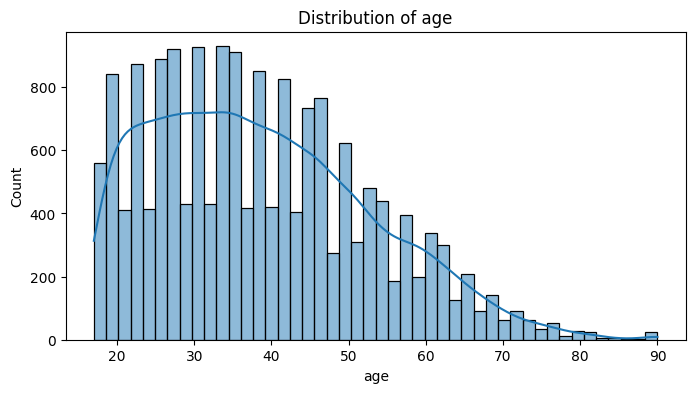

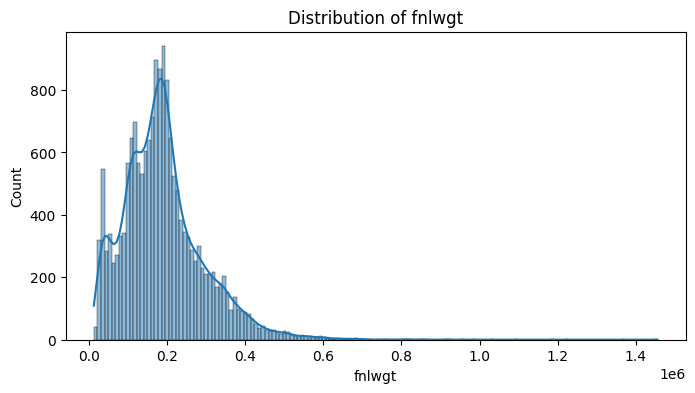

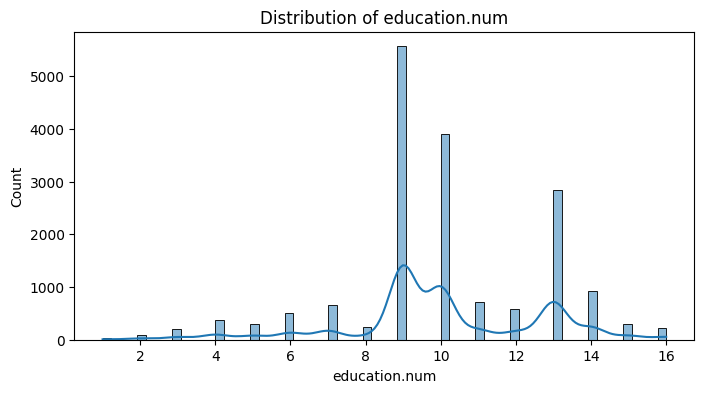

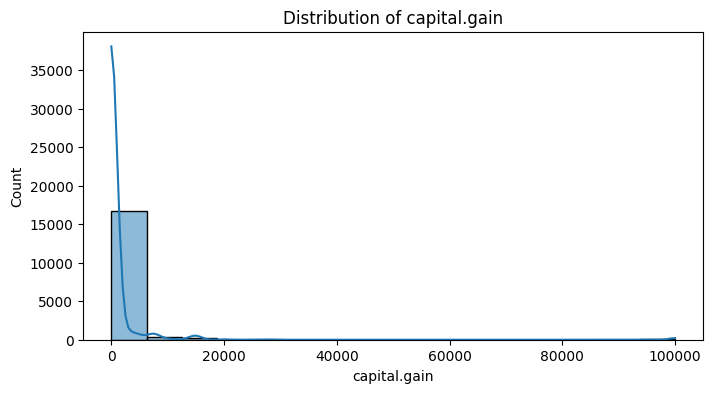

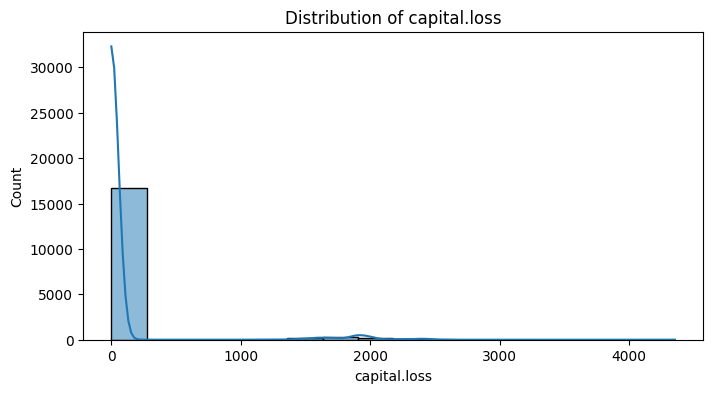

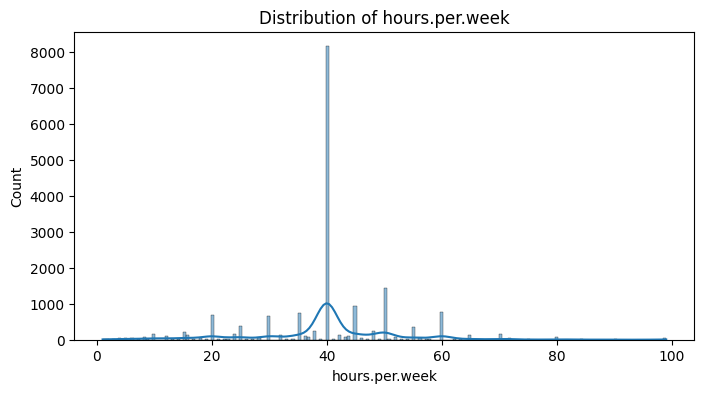

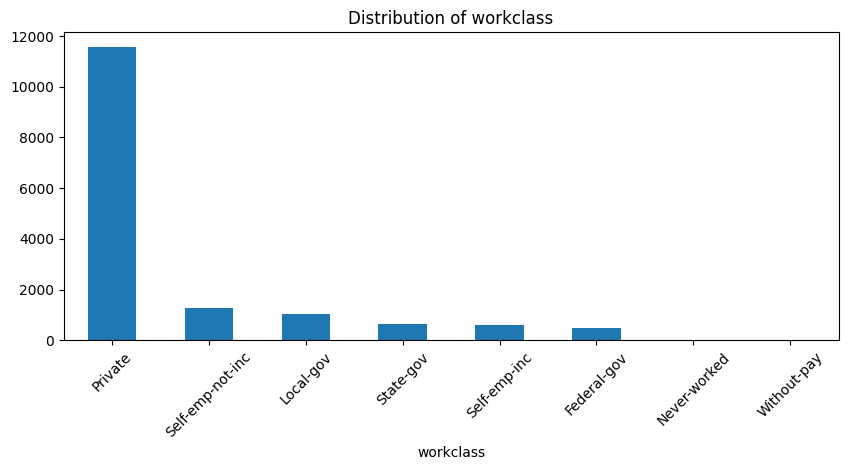

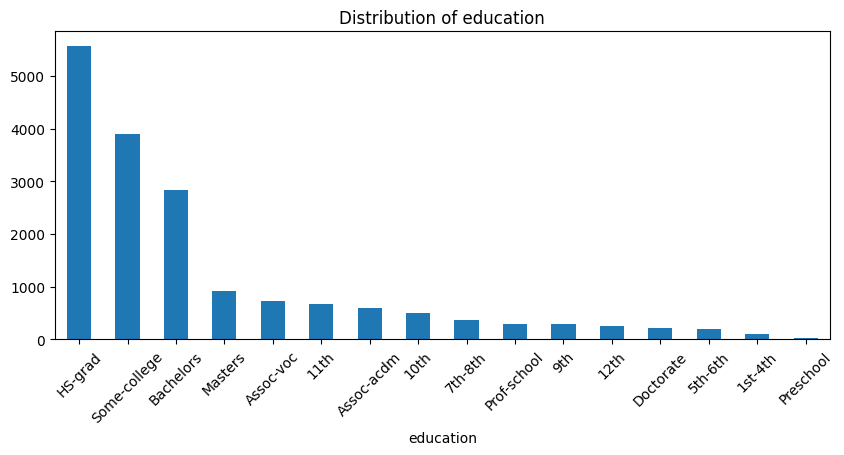

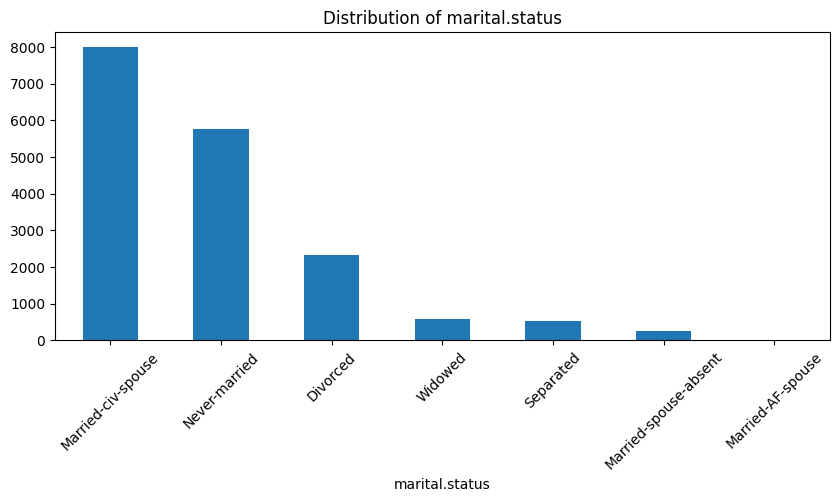

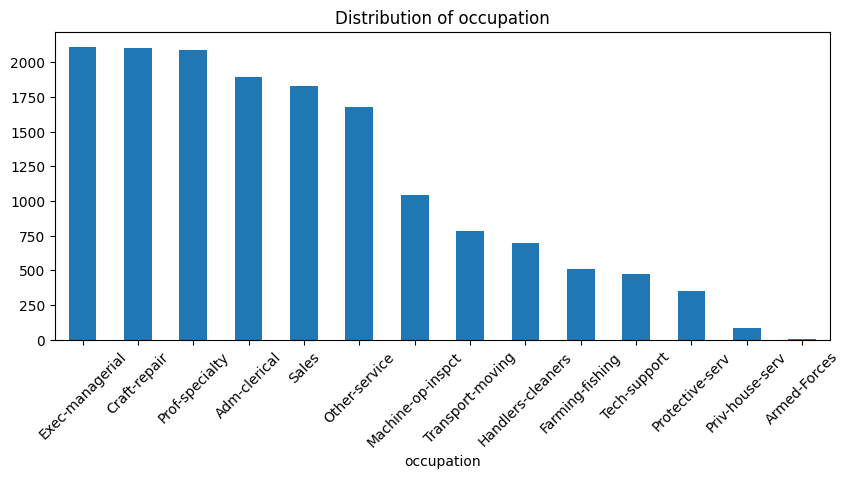

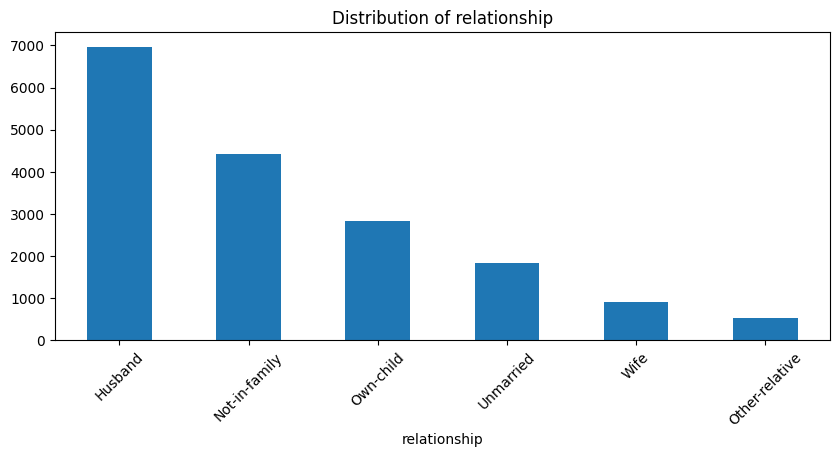

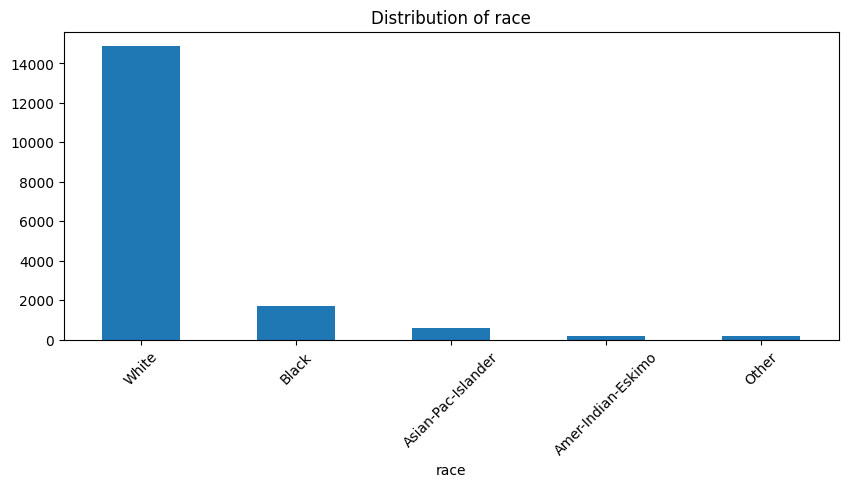

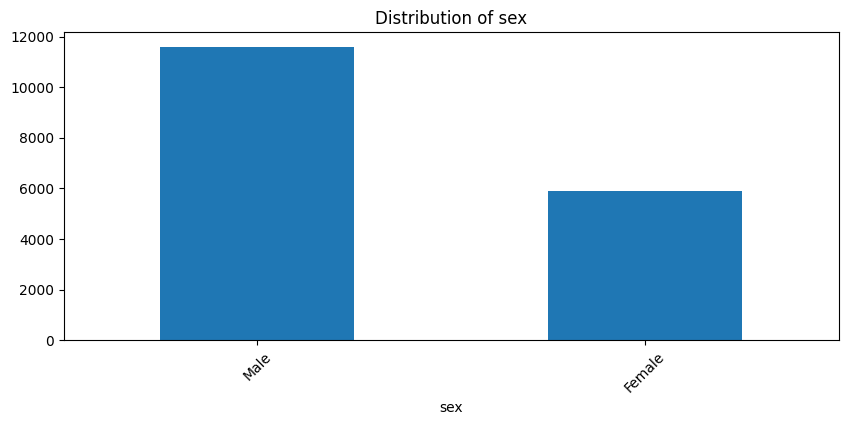

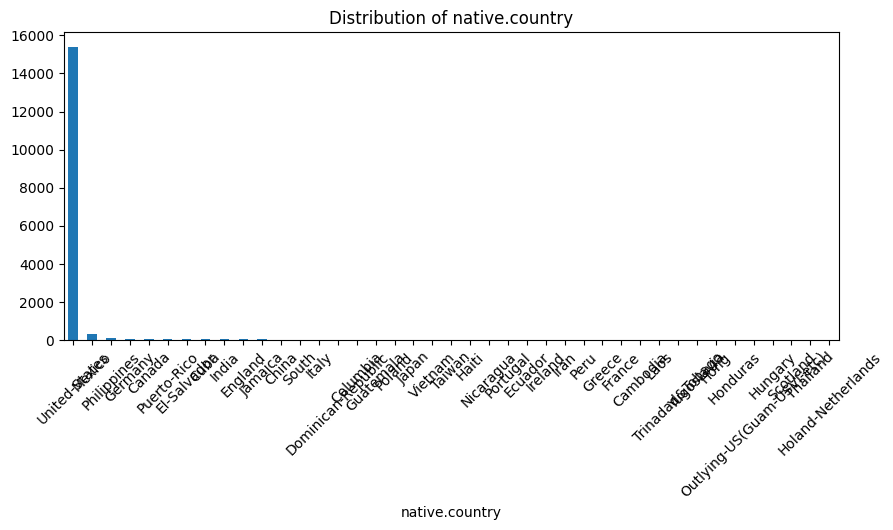

In [20]:
numeric_columns = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(train[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# 범주형 변수의 고유값 분포 확인
categorical_columns = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    train[column].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

In [21]:
train_cat_columns = train.select_dtypes(include='object').columns
train_num_columns = train.select_dtypes(exclude='object').columns

print('Categorical Columns: \n{}\n\n Numeric Columns: \n{}\n'.format(train_cat_columns,train_num_columns))

Categorical Columns: 
Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')

 Numeric Columns: 
Index(['index', 'id', 'age', 'fnlwgt', 'education.num', 'capital.gain',
       'capital.loss', 'hours.per.week', 'target'],
      dtype='object')



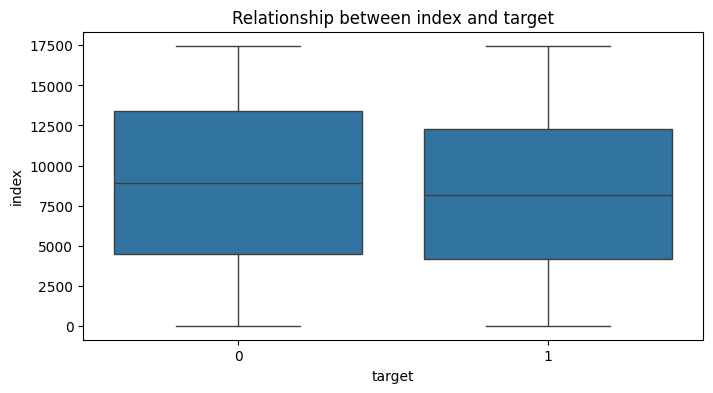

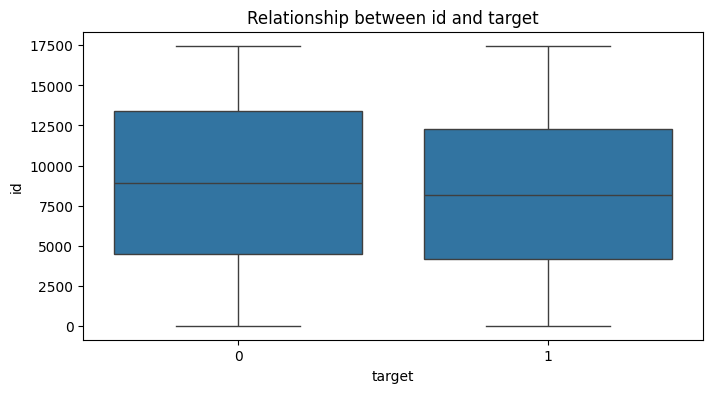

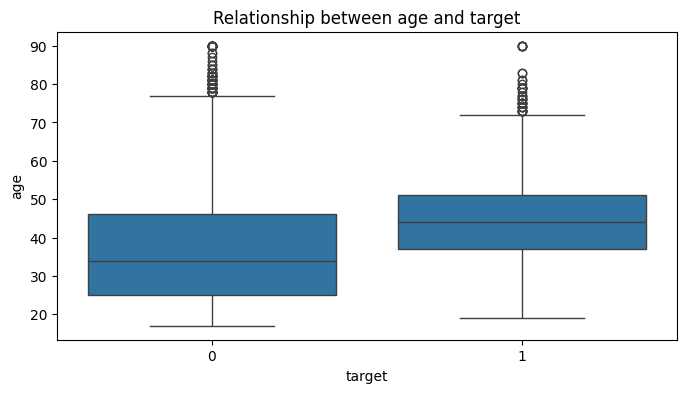

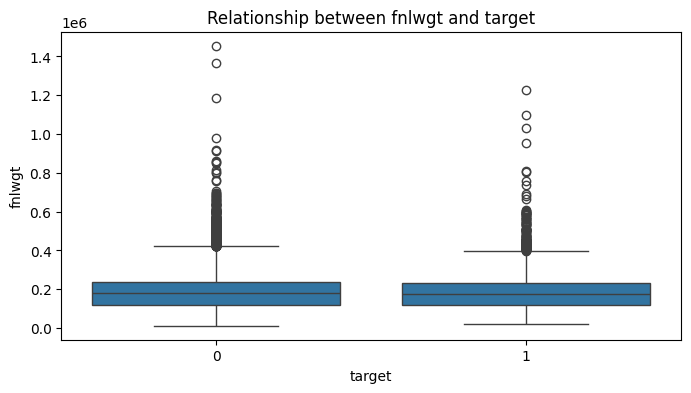

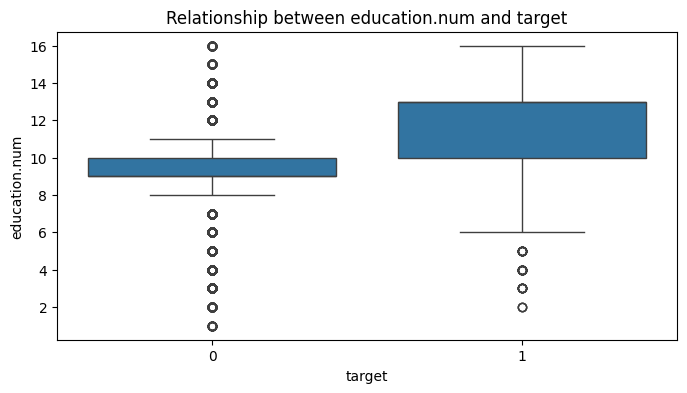

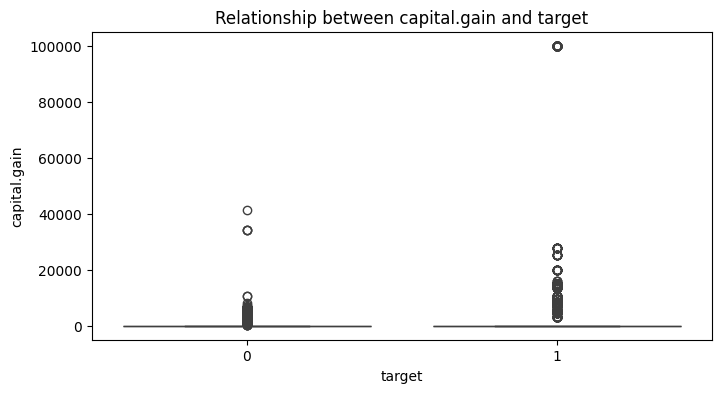

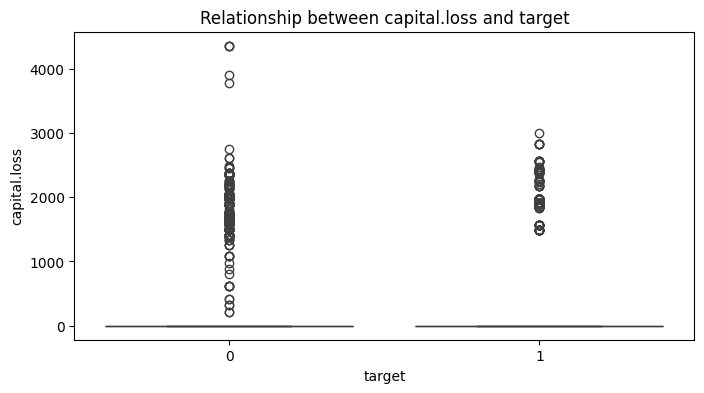

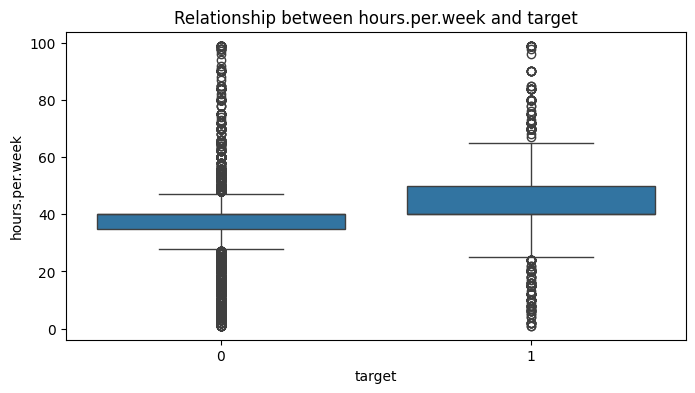

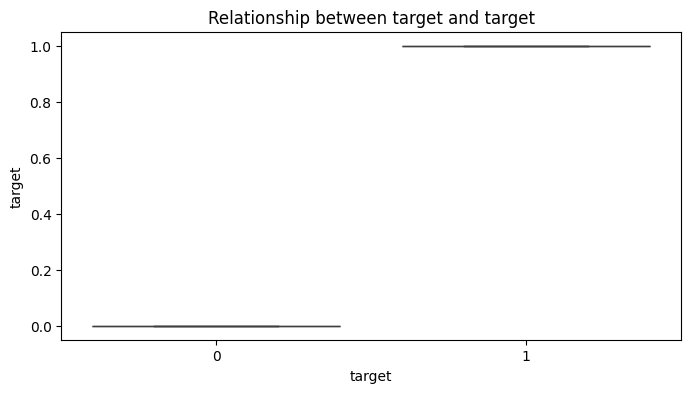

In [22]:
for column in train_num_columns :
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='target', y=column, data=train)
    plt.title(f'Relationship between {column} and target')
    plt.show()

age, education_num, hours.per.week 이 target과 상대적으로 큰 상관관계 보임.

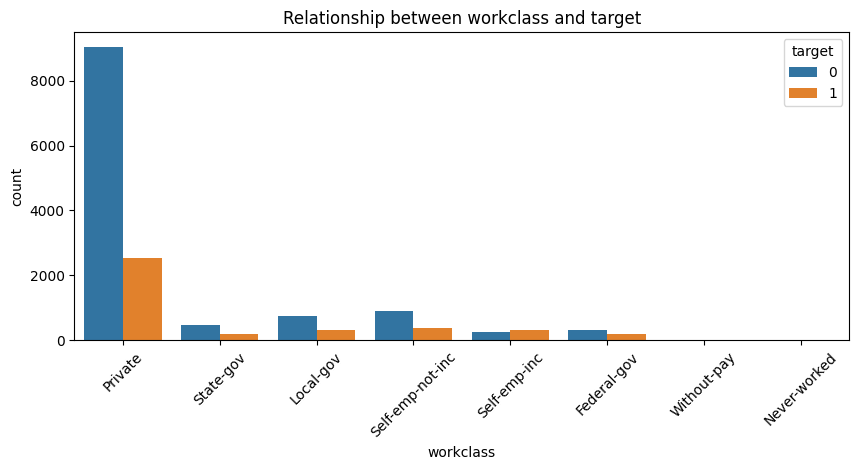

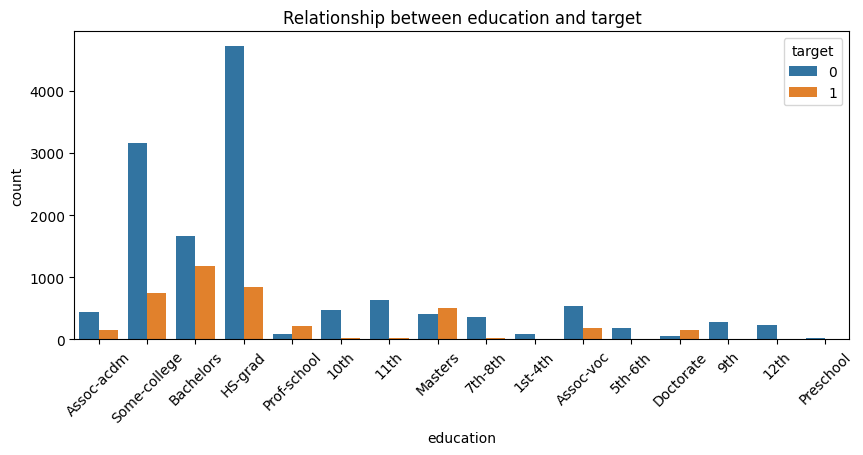

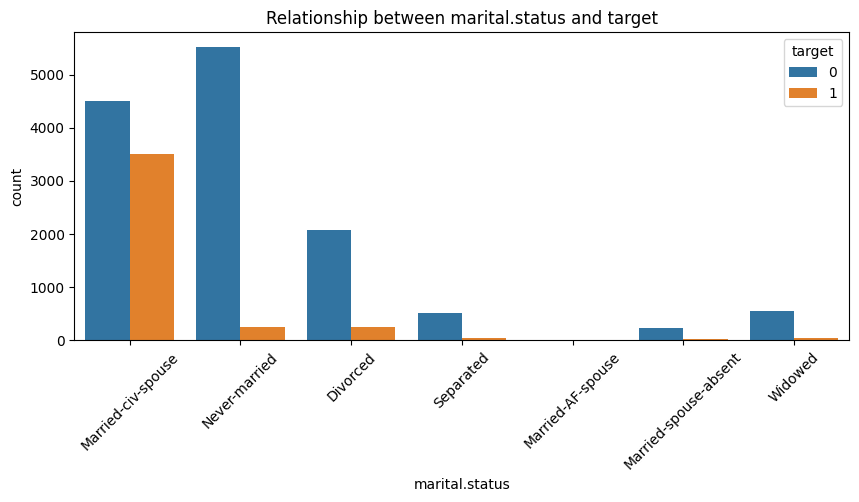

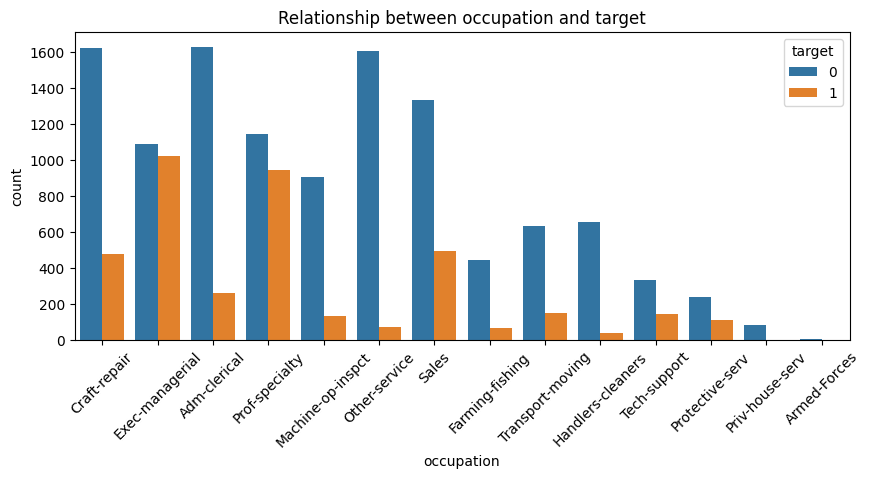

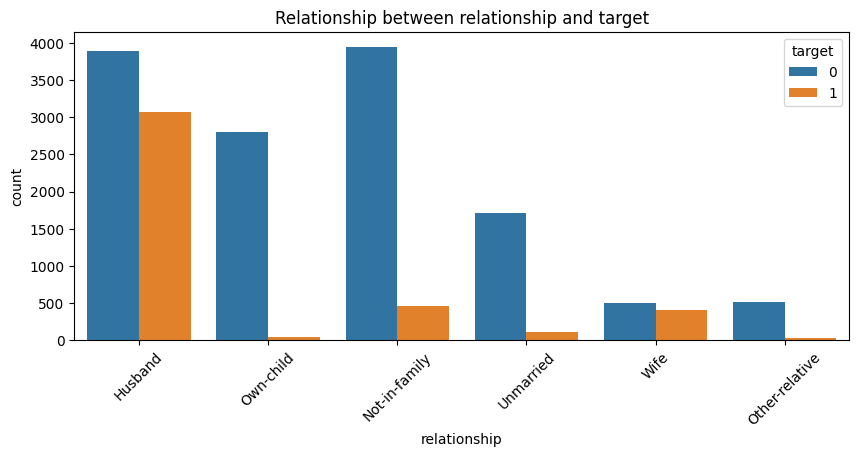

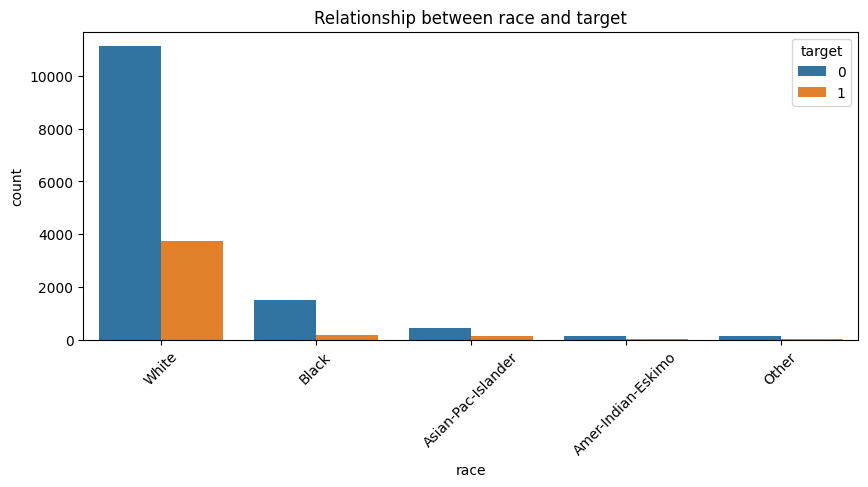

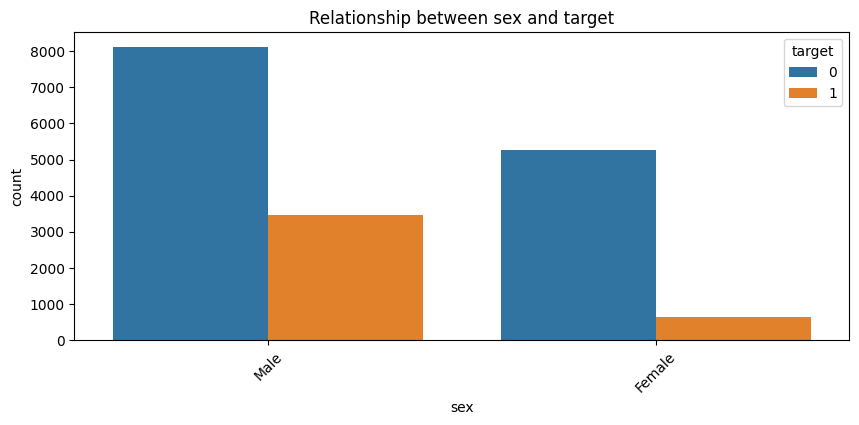

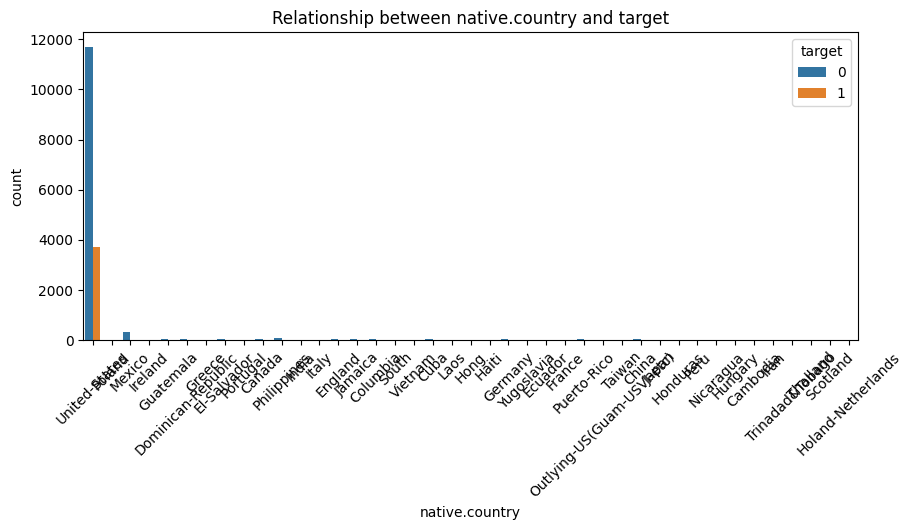

In [23]:
for column in train_cat_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=column, hue='target', data=train)
    plt.title(f'Relationship between {column} and target')
    plt.xticks(rotation=45)
    plt.show()
    

In [24]:

"""
Self-imp-inc
    Federal-gov
    without-pay
    Never-worked
"""

'\nSelf-imp-inc\n    Federal-gov\n    without-pay\n    Never-worked\n'

In [25]:
private_count = (train['workclass'] == 'Private').sum()
print(private_count)


11568


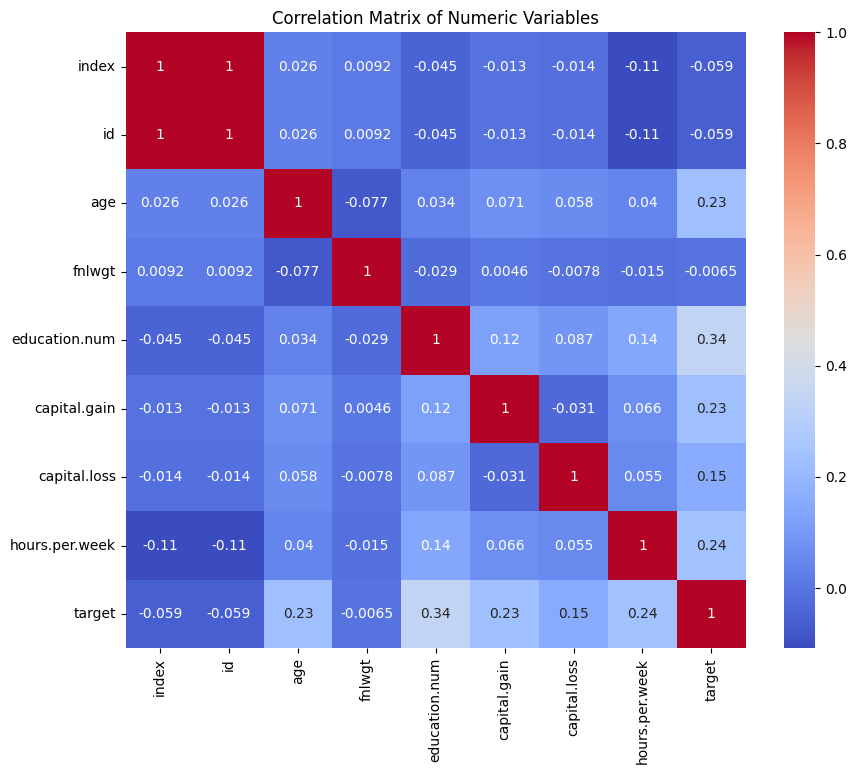

In [26]:
plt.figure(figsize=(10, 8))
corr = train[train_num_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

In [27]:
def make_label_map(dataframe):
    label_maps = {}
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            label_map = {'unknown':0}
            for i, key in enumerate(dataframe[col].unique()):
                label_map[key] = i  #새로 등장하는 유니크 값들에 대해 1부터 1씩 증가시켜 키값을 부여해줍니다.
            label_maps[col] = label_map
    return label_maps

# 각 범주형 변수에 인코딩 값을 부여하는 함수
def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            dataframe[col] = dataframe[col].map(label_map[col])
            #dataframe[col] = dataframe[col].fillna(label_map[col]['unknown']) #혹시 모를 결측값은 unknown의 값(0)으로 채워줍니다.
    return dataframe

train = label_encoder(train, make_label_map(train))

In [28]:
train

,index,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,0,32,0,309513,0,12,0,0,0,0,0,0,0,40,0,0
1,1,1,33,0,205469,1,10,0,1,0,0,0,0,0,40,0,1
2,2,2,46,0,149949,1,10,0,0,0,0,0,0,0,40,0,0
3,3,3,23,0,193090,2,13,1,2,1,0,1,0,0,30,0,0
4,4,4,55,0,60193,3,9,2,2,2,0,1,0,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17475,17475,17475,35,7,320084,2,13,0,14,4,0,1,0,0,55,0,1
17476,17476,17476,30,7,33811,2,13,1,14,2,2,1,0,0,99,0,0
17477,17477,17477,71,7,287372,12,16,0,14,0,0,0,0,0,10,0,1
17478,17478,17478,41,7,202822,3,9,3,14,2,1,1,0,0,32,0,0


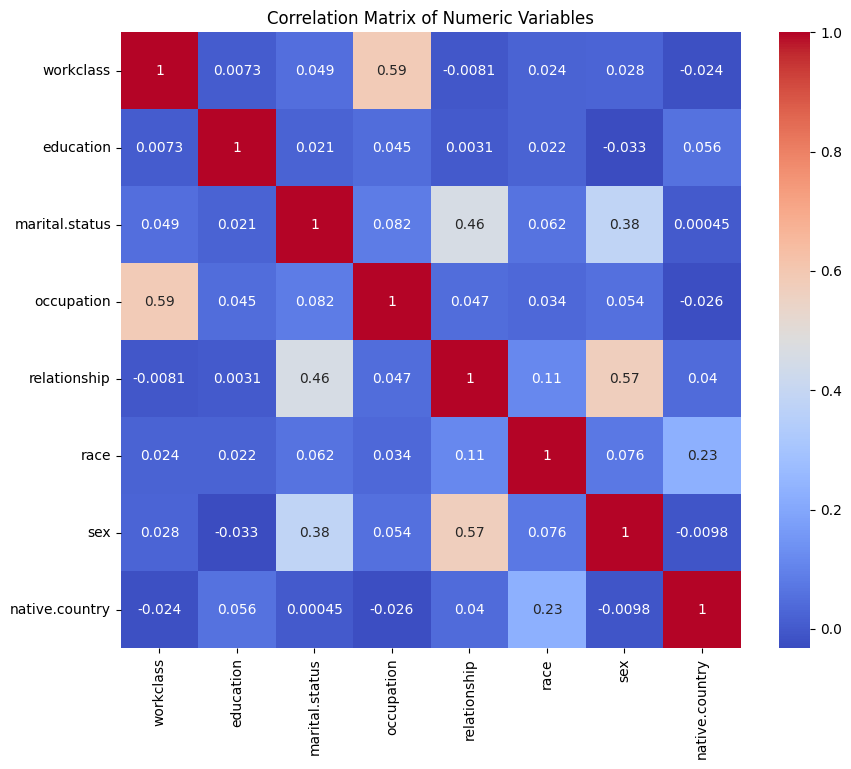

In [29]:
plt.figure(figsize=(10, 8))
corr = train[train_cat_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

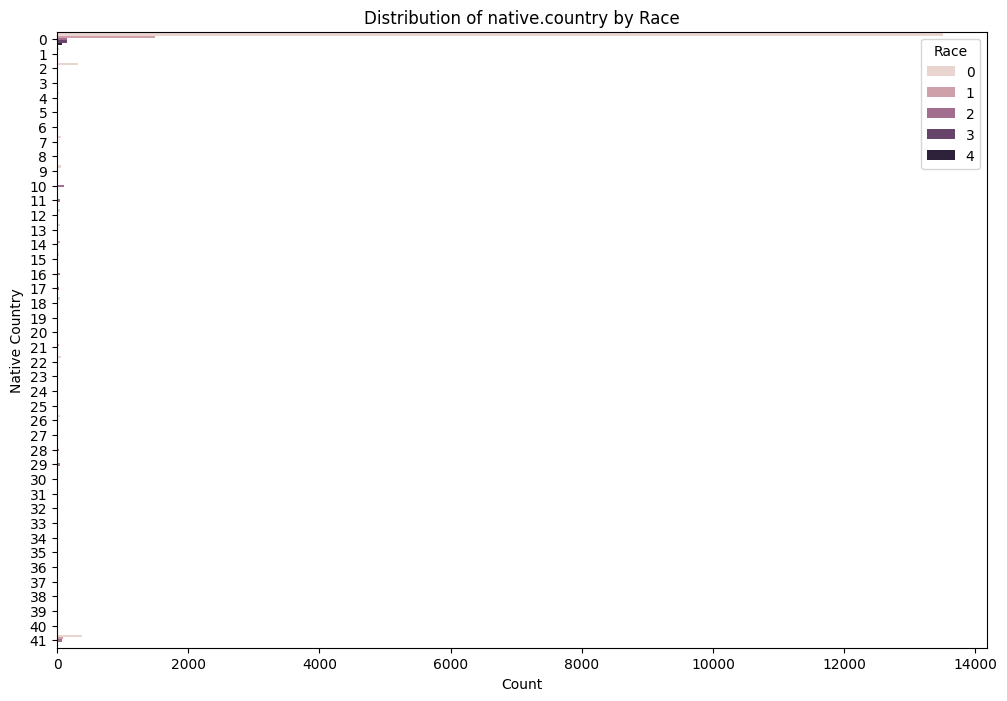

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'race'별로 데이터를 분할하여 'native.country'의 분포를 보여주는 countplot 생성
plt.figure(figsize=(12, 8))
sns.countplot(y='native.country', hue='race', data=train)
plt.title('Distribution of native.country by Race')
plt.xlabel('Count')
plt.ylabel('Native Country')
plt.legend(title='Race')
plt.show()

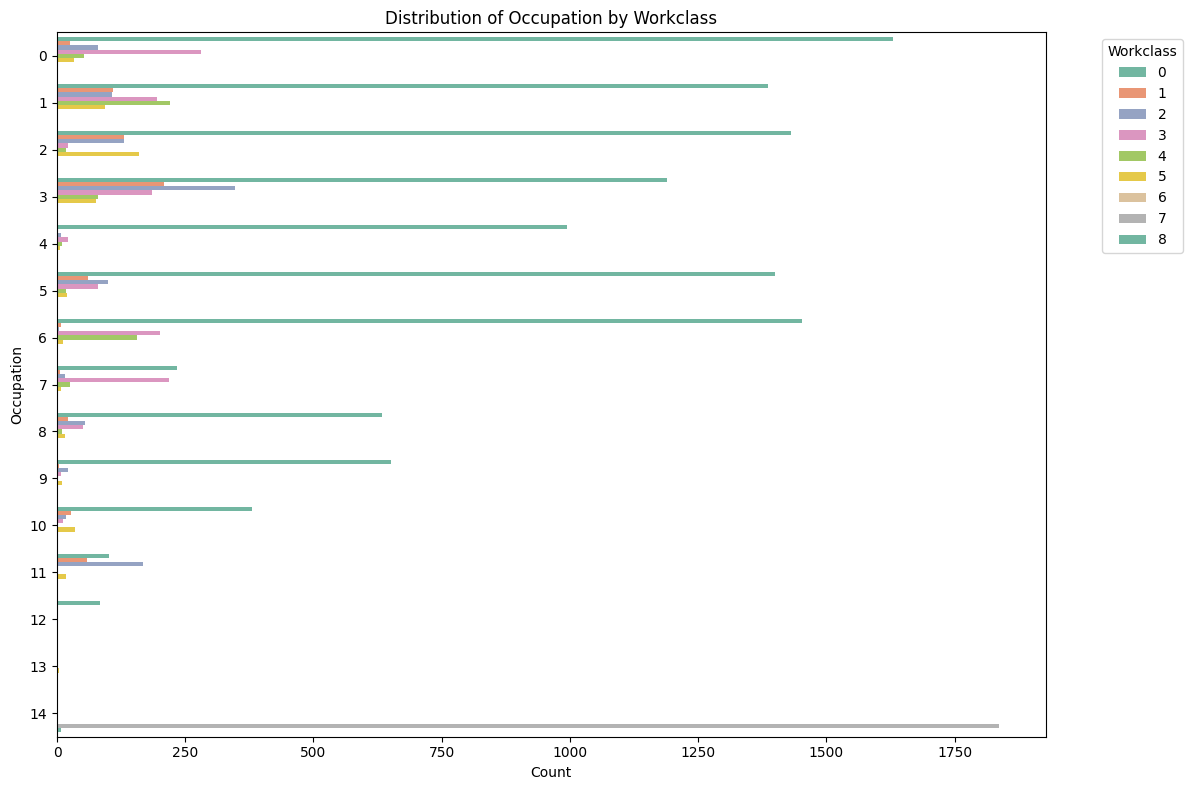

In [31]:
plt.figure(figsize=(12, 8))
sns.countplot(y='occupation', hue='workclass', data=train, palette='Set2')
plt.title('Distribution of Occupation by Workclass')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.legend(title='Workclass', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

workclass의 결측값을 never-worked에 합치자.
설문조사에 기반한 데이터다보니, 무직인 사람들은 수입이 없기에 입력을 안했을 수 있다.
occupation의 nan 값은 의미 있는 nan값이 된다.

native.country와 race의 상관관계가 높으니, native.country의 결측값을 race의 country에 대한 분포값을 참고해서 채우자.

In [32]:
train['native.country'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41])

In [33]:
train.columns = train.columns.str.replace('.','_')
test.columns = test.columns.str.replace('.','_')

In [34]:
# 'workclass' 열의 결측값을 'Never-worked'로 대체
train['workclass'] = train['workclass'].apply(lambda x: 'Never-worked' if x is None else x)

# 'occupation' 열의 결측값을 'Others'로 대체
# 'occupation' 열에서 결측값이 의미 있는 값으로 간주될 수 있음을 반영
train['occupation'] = train['occupation'].apply(lambda x: 'Others' if x is None else x)

# 'native.country'와 race의 상관관계가 큼을 확인.
# 'native.country' 열의 결측값을 race에 따른 native.country의 분포를 참조하여 채운다.

# 각 'race'에 대한 'native.country'의 가장 흔한 값 찾기
most_common_countries_per_race = train.groupby('race')['native_country'].apply(lambda x: x.mode().iloc[0])

# 'native.country'의 결측값을 해당 'race'의 가장 흔한 값으로 채우기
for race, common_country in most_common_countries_per_race.items():
    condition = (train['race'] == race) & (train['native_country'].isnull())
    train.loc[condition, 'native_country'] = common_country

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn import metrics

In [36]:
x_train, x_valid, y_train, y_valid = train_test_split(train, label,
                                                      test_size=0.3,
                                                      shuffle=True,
                                                      stratify=label)

In [41]:
x_train = x_train.reset_index(drop=True)
x_valid = x_valid.reset_index(drop=True)
x_test = test

In [39]:
cat_columns = train.select_dtypes(include='object').columns
num_columns = train.select_dtypes(exclude='object').columns

In [46]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

ohe = OneHotEncoder(sparse=False)

# ohe.fit(x_train[cat_columns])
ohe.fit(pd.concat([x_train[cat_columns], x_valid[cat_columns], x_test[cat_columns]]))
ohe_columns = ohe.get_feature_names_out()

new_x_train_cat = pd.DataFrame(ohe.transform(x_train[cat_columns]), columns=ohe_columns)
new_x_valid_cat = pd.DataFrame(ohe.transform(x_valid[cat_columns]), columns=ohe_columns)
new_x_test_cat  = pd.DataFrame(ohe.transform(x_test[cat_columns]), columns=ohe_columns)

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'